(503, 5, 5)
(168, 5, 5)
(503,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 35)             5740      
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 35)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 5, 35)             9940      
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 35)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 35)                9940      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 36        
Total params: 25,656
Trainable params: 25,656
Non-trainable params: 0
_________________________________________

503/503 [==============================] - 0s 502us/step - loss: 1.1010 - acc: 0.0159 - val_loss: 0.8706 - val_acc: 0.0139
Epoch 53/1500
503/503 [==============================] - 0s 524us/step - loss: 1.0861 - acc: 0.0139 - val_loss: 0.8623 - val_acc: 0.0139
Epoch 54/1500
503/503 [==============================] - 0s 523us/step - loss: 0.9420 - acc: 0.0159 - val_loss: 0.7856 - val_acc: 0.0159
Epoch 55/1500
503/503 [==============================] - 0s 538us/step - loss: 0.9857 - acc: 0.0099 - val_loss: 0.7562 - val_acc: 0.0139
Epoch 56/1500
503/503 [==============================] - 0s 490us/step - loss: 0.8406 - acc: 0.0139 - val_loss: 0.6833 - val_acc: 0.0199
Epoch 57/1500
503/503 [==============================] - 0s 530us/step - loss: 0.9179 - acc: 0.0199 - val_loss: 0.6803 - val_acc: 0.0179
Epoch 58/1500
503/503 [==============================] - 0s 523us/step - loss: 0.9566 - acc: 0.0159 - val_loss: 0.7104 - val_acc: 0.0179
Epoch 59/1500
503/503 [==============================] 

Epoch 112/1500
503/503 [==============================] - 0s 539us/step - loss: 0.3353 - acc: 0.0219 - val_loss: 0.2208 - val_acc: 0.0298
Epoch 113/1500
503/503 [==============================] - 0s 520us/step - loss: 0.3112 - acc: 0.0219 - val_loss: 0.2615 - val_acc: 0.0258
Epoch 114/1500
503/503 [==============================] - 0s 509us/step - loss: 0.3146 - acc: 0.0239 - val_loss: 0.2413 - val_acc: 0.0278
Epoch 115/1500
503/503 [==============================] - 0s 499us/step - loss: 0.3302 - acc: 0.0258 - val_loss: 0.2276 - val_acc: 0.0278
Epoch 116/1500
503/503 [==============================] - 0s 521us/step - loss: 0.3082 - acc: 0.0239 - val_loss: 0.2073 - val_acc: 0.0298
Epoch 117/1500
503/503 [==============================] - 0s 521us/step - loss: 0.3159 - acc: 0.0258 - val_loss: 0.2091 - val_acc: 0.0278
Epoch 118/1500
503/503 [==============================] - 0s 523us/step - loss: 0.2957 - acc: 0.0258 - val_loss: 0.2079 - val_acc: 0.0239
Epoch 119/1500
503/503 [==========

503/503 [==============================] - 0s 533us/step - loss: 0.2153 - acc: 0.0278 - val_loss: 0.1776 - val_acc: 0.0298
Epoch 172/1500
503/503 [==============================] - 0s 525us/step - loss: 0.2148 - acc: 0.0298 - val_loss: 0.1242 - val_acc: 0.0318
Epoch 173/1500
503/503 [==============================] - 0s 529us/step - loss: 0.1883 - acc: 0.0298 - val_loss: 0.1490 - val_acc: 0.0318
Epoch 174/1500
503/503 [==============================] - 0s 517us/step - loss: 0.2370 - acc: 0.0199 - val_loss: 0.1596 - val_acc: 0.0298
Epoch 175/1500
503/503 [==============================] - 0s 506us/step - loss: 0.2008 - acc: 0.0258 - val_loss: 0.1499 - val_acc: 0.0318
Epoch 176/1500
503/503 [==============================] - 0s 523us/step - loss: 0.1799 - acc: 0.0338 - val_loss: 0.1396 - val_acc: 0.0338
Epoch 177/1500
503/503 [==============================] - 0s 539us/step - loss: 0.1897 - acc: 0.0358 - val_loss: 0.1256 - val_acc: 0.0298
Epoch 178/1500
503/503 [=========================

503/503 [==============================] - 0s 563us/step - loss: 0.1589 - acc: 0.0358 - val_loss: 0.1382 - val_acc: 0.0318
Epoch 231/1500
503/503 [==============================] - 0s 512us/step - loss: 0.1712 - acc: 0.0278 - val_loss: 0.0947 - val_acc: 0.0338
Epoch 232/1500
503/503 [==============================] - 0s 509us/step - loss: 0.1448 - acc: 0.0318 - val_loss: 0.0953 - val_acc: 0.0298
Epoch 233/1500
503/503 [==============================] - 0s 530us/step - loss: 0.1292 - acc: 0.0298 - val_loss: 0.0858 - val_acc: 0.0338
Epoch 234/1500
503/503 [==============================] - 0s 513us/step - loss: 0.1281 - acc: 0.0358 - val_loss: 0.0836 - val_acc: 0.0318
Epoch 235/1500
503/503 [==============================] - 0s 573us/step - loss: 0.1322 - acc: 0.0338 - val_loss: 0.0864 - val_acc: 0.0318
Epoch 236/1500
503/503 [==============================] - 0s 594us/step - loss: 0.1497 - acc: 0.0358 - val_loss: 0.1069 - val_acc: 0.0318
Epoch 237/1500
503/503 [=========================

503/503 [==============================] - 0s 499us/step - loss: 0.1190 - acc: 0.0298 - val_loss: 0.0685 - val_acc: 0.0318
Epoch 290/1500
503/503 [==============================] - 0s 537us/step - loss: 0.1184 - acc: 0.0278 - val_loss: 0.0590 - val_acc: 0.0318
Epoch 291/1500
503/503 [==============================] - 0s 518us/step - loss: 0.1118 - acc: 0.0358 - val_loss: 0.0569 - val_acc: 0.0338
Epoch 292/1500
503/503 [==============================] - 0s 512us/step - loss: 0.0962 - acc: 0.0318 - val_loss: 0.0852 - val_acc: 0.0338
Epoch 293/1500
503/503 [==============================] - 0s 492us/step - loss: 0.1163 - acc: 0.0338 - val_loss: 0.0917 - val_acc: 0.0318
Epoch 294/1500
503/503 [==============================] - 0s 528us/step - loss: 0.1375 - acc: 0.0318 - val_loss: 0.1016 - val_acc: 0.0318
Epoch 295/1500
503/503 [==============================] - 0s 512us/step - loss: 0.1153 - acc: 0.0298 - val_loss: 0.0692 - val_acc: 0.0318
Epoch 296/1500
503/503 [=========================

503/503 [==============================] - 0s 505us/step - loss: 0.1052 - acc: 0.0338 - val_loss: 0.0658 - val_acc: 0.0338
Epoch 349/1500
503/503 [==============================] - 0s 517us/step - loss: 0.1018 - acc: 0.0358 - val_loss: 0.0777 - val_acc: 0.0338
Epoch 350/1500
503/503 [==============================] - 0s 500us/step - loss: 0.1010 - acc: 0.0338 - val_loss: 0.0582 - val_acc: 0.0338
Epoch 351/1500
503/503 [==============================] - 0s 535us/step - loss: 0.1060 - acc: 0.0338 - val_loss: 0.0567 - val_acc: 0.0358
Epoch 352/1500
503/503 [==============================] - 0s 511us/step - loss: 0.0935 - acc: 0.0358 - val_loss: 0.0495 - val_acc: 0.0358
Epoch 353/1500
503/503 [==============================] - 0s 498us/step - loss: 0.0959 - acc: 0.0338 - val_loss: 0.0544 - val_acc: 0.0358
Epoch 354/1500
503/503 [==============================] - 0s 493us/step - loss: 0.0972 - acc: 0.0298 - val_loss: 0.0516 - val_acc: 0.0358
Epoch 355/1500
503/503 [=========================

503/503 [==============================] - 0s 606us/step - loss: 0.0824 - acc: 0.0338 - val_loss: 0.0603 - val_acc: 0.0338
Epoch 408/1500
503/503 [==============================] - 0s 653us/step - loss: 0.0864 - acc: 0.0338 - val_loss: 0.0655 - val_acc: 0.0318
Epoch 409/1500
503/503 [==============================] - 0s 633us/step - loss: 0.0936 - acc: 0.0318 - val_loss: 0.0375 - val_acc: 0.0358
Epoch 410/1500
503/503 [==============================] - 0s 638us/step - loss: 0.0732 - acc: 0.0298 - val_loss: 0.0385 - val_acc: 0.0358
Epoch 411/1500
503/503 [==============================] - 0s 626us/step - loss: 0.0756 - acc: 0.0318 - val_loss: 0.0415 - val_acc: 0.0358
Epoch 412/1500
503/503 [==============================] - 0s 651us/step - loss: 0.0814 - acc: 0.0358 - val_loss: 0.0518 - val_acc: 0.0338
Epoch 413/1500
503/503 [==============================] - 0s 613us/step - loss: 0.0781 - acc: 0.0338 - val_loss: 0.0741 - val_acc: 0.0318
Epoch 414/1500
503/503 [=========================

503/503 [==============================] - 0s 512us/step - loss: 0.0872 - acc: 0.0338 - val_loss: 0.0741 - val_acc: 0.0358
Epoch 467/1500
503/503 [==============================] - 0s 492us/step - loss: 0.0839 - acc: 0.0358 - val_loss: 0.0429 - val_acc: 0.0358
Epoch 468/1500
503/503 [==============================] - 0s 532us/step - loss: 0.0772 - acc: 0.0318 - val_loss: 0.0707 - val_acc: 0.0358
Epoch 469/1500
503/503 [==============================] - 0s 507us/step - loss: 0.0860 - acc: 0.0338 - val_loss: 0.0416 - val_acc: 0.0358
Epoch 470/1500
503/503 [==============================] - 0s 510us/step - loss: 0.0803 - acc: 0.0358 - val_loss: 0.0396 - val_acc: 0.0338
Epoch 471/1500
503/503 [==============================] - 0s 508us/step - loss: 0.0666 - acc: 0.0358 - val_loss: 0.0377 - val_acc: 0.0358
Epoch 472/1500
503/503 [==============================] - 0s 521us/step - loss: 0.0746 - acc: 0.0338 - val_loss: 0.0410 - val_acc: 0.0358
Epoch 473/1500
503/503 [=========================

503/503 [==============================] - 0s 501us/step - loss: 0.0646 - acc: 0.0338 - val_loss: 0.0343 - val_acc: 0.0358
Epoch 526/1500
503/503 [==============================] - 0s 525us/step - loss: 0.0687 - acc: 0.0338 - val_loss: 0.0336 - val_acc: 0.0358
Epoch 527/1500
503/503 [==============================] - 0s 505us/step - loss: 0.0672 - acc: 0.0358 - val_loss: 0.0371 - val_acc: 0.0358
Epoch 528/1500
503/503 [==============================] - 0s 524us/step - loss: 0.0709 - acc: 0.0318 - val_loss: 0.0274 - val_acc: 0.0358
Epoch 529/1500
503/503 [==============================] - 0s 521us/step - loss: 0.0695 - acc: 0.0358 - val_loss: 0.0420 - val_acc: 0.0358
Epoch 530/1500
503/503 [==============================] - 0s 510us/step - loss: 0.0686 - acc: 0.0358 - val_loss: 0.0354 - val_acc: 0.0358
Epoch 531/1500
503/503 [==============================] - 0s 523us/step - loss: 0.0914 - acc: 0.0338 - val_loss: 0.0413 - val_acc: 0.0358
Epoch 532/1500
503/503 [=========================

503/503 [==============================] - 0s 521us/step - loss: 0.0656 - acc: 0.0358 - val_loss: 0.0289 - val_acc: 0.0358
Epoch 585/1500
503/503 [==============================] - 0s 491us/step - loss: 0.0692 - acc: 0.0338 - val_loss: 0.0366 - val_acc: 0.0358
Epoch 586/1500
503/503 [==============================] - 0s 487us/step - loss: 0.0674 - acc: 0.0358 - val_loss: 0.0297 - val_acc: 0.0358
Epoch 587/1500
503/503 [==============================] - 0s 493us/step - loss: 0.0588 - acc: 0.0358 - val_loss: 0.0304 - val_acc: 0.0358
Epoch 588/1500
503/503 [==============================] - 0s 526us/step - loss: 0.0710 - acc: 0.0318 - val_loss: 0.0435 - val_acc: 0.0358
Epoch 589/1500
503/503 [==============================] - 0s 500us/step - loss: 0.0750 - acc: 0.0358 - val_loss: 0.0309 - val_acc: 0.0358
Epoch 590/1500
503/503 [==============================] - 0s 522us/step - loss: 0.0525 - acc: 0.0318 - val_loss: 0.0298 - val_acc: 0.0358
Epoch 591/1500
503/503 [=========================

503/503 [==============================] - 0s 570us/step - loss: 0.0674 - acc: 0.0318 - val_loss: 0.0391 - val_acc: 0.0358
Epoch 644/1500
503/503 [==============================] - 0s 581us/step - loss: 0.0574 - acc: 0.0338 - val_loss: 0.0313 - val_acc: 0.0358
Epoch 645/1500
503/503 [==============================] - 0s 507us/step - loss: 0.0500 - acc: 0.0358 - val_loss: 0.0420 - val_acc: 0.0338
Epoch 646/1500
503/503 [==============================] - 0s 467us/step - loss: 0.0620 - acc: 0.0338 - val_loss: 0.0271 - val_acc: 0.0338
Epoch 647/1500
503/503 [==============================] - 0s 525us/step - loss: 0.0567 - acc: 0.0338 - val_loss: 0.0309 - val_acc: 0.0358
Epoch 648/1500
503/503 [==============================] - 0s 513us/step - loss: 0.0546 - acc: 0.0358 - val_loss: 0.0235 - val_acc: 0.0358
Epoch 649/1500
503/503 [==============================] - 0s 541us/step - loss: 0.0578 - acc: 0.0338 - val_loss: 0.0253 - val_acc: 0.0358
Epoch 650/1500
503/503 [=========================

503/503 [==============================] - 0s 483us/step - loss: 0.0589 - acc: 0.0338 - val_loss: 0.0207 - val_acc: 0.0358
Epoch 703/1500
503/503 [==============================] - 0s 546us/step - loss: 0.0571 - acc: 0.0338 - val_loss: 0.0266 - val_acc: 0.0358
Epoch 704/1500
503/503 [==============================] - 0s 501us/step - loss: 0.0627 - acc: 0.0338 - val_loss: 0.0633 - val_acc: 0.0358
Epoch 705/1500
503/503 [==============================] - 0s 504us/step - loss: 0.0685 - acc: 0.0338 - val_loss: 0.0247 - val_acc: 0.0358
Epoch 706/1500
503/503 [==============================] - 0s 485us/step - loss: 0.0550 - acc: 0.0358 - val_loss: 0.0252 - val_acc: 0.0358
Epoch 707/1500
503/503 [==============================] - 0s 515us/step - loss: 0.0627 - acc: 0.0358 - val_loss: 0.0358 - val_acc: 0.0358
Epoch 708/1500
503/503 [==============================] - 0s 498us/step - loss: 0.0543 - acc: 0.0338 - val_loss: 0.0206 - val_acc: 0.0358
Epoch 709/1500
503/503 [=========================

503/503 [==============================] - 0s 479us/step - loss: 0.0702 - acc: 0.0338 - val_loss: 0.0250 - val_acc: 0.0358
Epoch 762/1500
503/503 [==============================] - 0s 493us/step - loss: 0.0500 - acc: 0.0358 - val_loss: 0.0288 - val_acc: 0.0358
Epoch 763/1500
503/503 [==============================] - 0s 512us/step - loss: 0.0522 - acc: 0.0318 - val_loss: 0.0220 - val_acc: 0.0358
Epoch 764/1500
503/503 [==============================] - 0s 528us/step - loss: 0.0484 - acc: 0.0358 - val_loss: 0.0259 - val_acc: 0.0358
Epoch 765/1500
503/503 [==============================] - 0s 534us/step - loss: 0.0486 - acc: 0.0338 - val_loss: 0.0271 - val_acc: 0.0358
Epoch 766/1500
503/503 [==============================] - 0s 497us/step - loss: 0.0478 - acc: 0.0358 - val_loss: 0.0229 - val_acc: 0.0358
Epoch 767/1500
503/503 [==============================] - 0s 483us/step - loss: 0.0453 - acc: 0.0358 - val_loss: 0.0232 - val_acc: 0.0358
Epoch 768/1500
503/503 [=========================

503/503 [==============================] - 0s 532us/step - loss: 0.0536 - acc: 0.0358 - val_loss: 0.0243 - val_acc: 0.0358
Epoch 821/1500
503/503 [==============================] - 0s 512us/step - loss: 0.0569 - acc: 0.0358 - val_loss: 0.0493 - val_acc: 0.0338
Epoch 822/1500
503/503 [==============================] - 0s 509us/step - loss: 0.0614 - acc: 0.0358 - val_loss: 0.0254 - val_acc: 0.0358
Epoch 823/1500
503/503 [==============================] - 0s 558us/step - loss: 0.0485 - acc: 0.0338 - val_loss: 0.0241 - val_acc: 0.0358
Epoch 824/1500
503/503 [==============================] - 0s 534us/step - loss: 0.0497 - acc: 0.0358 - val_loss: 0.0232 - val_acc: 0.0358
Epoch 825/1500
503/503 [==============================] - 0s 534us/step - loss: 0.0540 - acc: 0.0338 - val_loss: 0.0203 - val_acc: 0.0358
Epoch 826/1500
503/503 [==============================] - 0s 533us/step - loss: 0.0481 - acc: 0.0338 - val_loss: 0.0288 - val_acc: 0.0358
Epoch 827/1500
503/503 [=========================

503/503 [==============================] - 0s 489us/step - loss: 0.0503 - acc: 0.0358 - val_loss: 0.0242 - val_acc: 0.0358
Epoch 880/1500
503/503 [==============================] - 0s 530us/step - loss: 0.0451 - acc: 0.0358 - val_loss: 0.0161 - val_acc: 0.0358
Epoch 881/1500
503/503 [==============================] - 0s 489us/step - loss: 0.0484 - acc: 0.0318 - val_loss: 0.0288 - val_acc: 0.0358
Epoch 882/1500
503/503 [==============================] - 0s 541us/step - loss: 0.0532 - acc: 0.0358 - val_loss: 0.0208 - val_acc: 0.0358
Epoch 883/1500
503/503 [==============================] - 0s 490us/step - loss: 0.0507 - acc: 0.0358 - val_loss: 0.0254 - val_acc: 0.0358
Epoch 884/1500
503/503 [==============================] - 0s 541us/step - loss: 0.0515 - acc: 0.0358 - val_loss: 0.0241 - val_acc: 0.0358
Epoch 885/1500
503/503 [==============================] - 0s 513us/step - loss: 0.0493 - acc: 0.0358 - val_loss: 0.0323 - val_acc: 0.0358
Epoch 886/1500
503/503 [=========================

503/503 [==============================] - 0s 511us/step - loss: 0.0484 - acc: 0.0358 - val_loss: 0.0229 - val_acc: 0.0358
Epoch 939/1500
503/503 [==============================] - 0s 535us/step - loss: 0.0556 - acc: 0.0358 - val_loss: 0.0369 - val_acc: 0.0358
Epoch 940/1500
503/503 [==============================] - 0s 509us/step - loss: 0.0484 - acc: 0.0338 - val_loss: 0.0255 - val_acc: 0.0358
Epoch 941/1500
503/503 [==============================] - 0s 512us/step - loss: 0.0447 - acc: 0.0338 - val_loss: 0.0301 - val_acc: 0.0358
Epoch 942/1500
503/503 [==============================] - 0s 515us/step - loss: 0.0596 - acc: 0.0358 - val_loss: 0.0658 - val_acc: 0.0358
Epoch 943/1500
503/503 [==============================] - 0s 473us/step - loss: 0.0598 - acc: 0.0338 - val_loss: 0.0303 - val_acc: 0.0358
Epoch 944/1500
503/503 [==============================] - 0s 536us/step - loss: 0.0672 - acc: 0.0338 - val_loss: 0.0403 - val_acc: 0.0358
Epoch 945/1500
503/503 [=========================

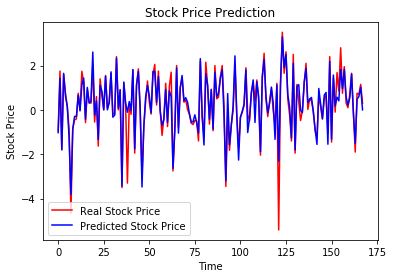

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

x_train = np.load('./StockData/TrainingData/NormtrainingX_stock0050.npy')
y_train = np.load('./StockData/TrainingData/trainingY_stock0050.npy')
x_test = np.load('./StockData/TrainingData/NormtestingX_stock0050.npy')
y_test = np.load('./StockData/TrainingData/testingY_stock0050.npy')
feature=x_train.shape[1]
x_train = np.where(np.isnan(x_train), 0, x_train)
x_test = np.where(np.isnan(x_test), 0, x_test)
y_train = np.where(np.isnan(y_train), 0, y_train)
x_train =x_train.reshape(-1,5,feature)
x_test =x_test.reshape(-1,5,feature)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

model = Sequential()
model.add(LSTM(35,input_shape=(5,x_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(35,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(35,return_sequences =False))
model.add(Dense(1))

sgd = optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mse",optimizer=sgd,metrics=['accuracy'])

model.summary()

callback = EarlyStopping(monitor="loss", patience=80, verbose=2, mode="auto")
tbCallBack = TensorBoard(log_dir='./logs',  # log 目录
                 histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
                 write_graph=True,  # 是否存储网络结构图
                 write_grads=True, # 是否可视化梯度直方图
                 write_images=True,# 是否可视化参数
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)
model.fit(x_train,y_train, epochs=1500, batch_size=20, callbacks=[callback,tbCallBack],validation_data=(x_train,y_train)
,validation_split=0.2)

model.save('my_model.h5') 

model.predict(x_test,verbose=1)

predicted_stock_price = model.predict(x_test)
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()